In [17]:
import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.traveltime as tt
from pygimli.physics.traveltime import load as loadGimliTT
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

In [18]:
peg_data = pg.load("S_wave_PEG_picks.sgt", verbose=True)
hammer_data = pg.load("S_wave_hammer_picks.sgt", verbose=True)
sensor_data = pg.DataContainer()
for i in range(63):
    sensor_data.createSensor(peg_data.sensorPosition(i))


16/10/25 - 13:05:45 - pyGIMLi - INFO - Reading S_wave_PEG_picks.sgt (<function load at 0x000001C0FDD9BEC0>)
16/10/25 - 13:05:45 - pyGIMLi - INFO - Reading S_wave_hammer_picks.sgt (<function load at 0x000001C0FDD9BEC0>)


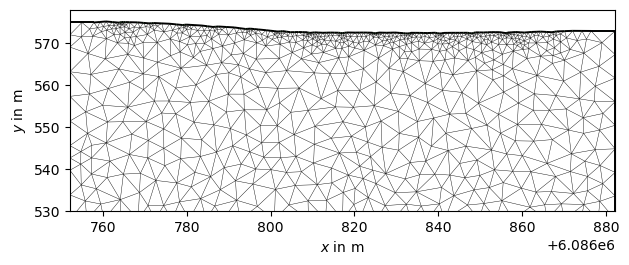

In [19]:
#sort the receiver and shot locations for a smooth mesh
sorted_positions = sorted(sensor_data.sensorPositions(), key=lambda pos: pos.x())


sorted_sensor_data = pg.DataContainer()
for pos in sorted_positions:
    sorted_sensor_data.createSensor(pos)

#Create mesh
plc = mt.createParaMeshPLC(sorted_sensor_data, paraDepth=45, boundary=0)

plc.createEdge(plc.node(plc.nodeCount()-2), plc.node(plc.nodeCount()-1), marker=3)

mesh = mt.createMesh(plc, quality=32.5, area=15)

fig, ax = plt.subplots()
pg.show(mesh, ax = ax, markers=False)
ax.set_ylim(530, 578)
plt.show()


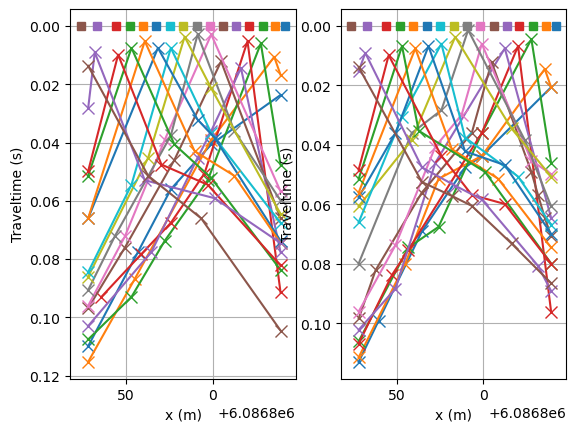

In [20]:
#Show first break picks

fig, ax = plt.subplots(1,2)
tt.drawFirstPicks(ax[0], hammer_data)
ax[0].invert_xaxis()
tt.drawFirstPicks(ax[1], peg_data)
ax[1].invert_xaxis()


## Inversions

In [21]:
# PEG
peg_inversion = tt.TravelTimeManager(peg_data, verbose=True, debug=False)
peg_inversion.setMesh(mesh)  # to set region properties later on
peg_inversion.inv.setRegularization(background=False) # for all regions
peg_inversion.invert(secNodes=3, vTop=100, vBottom=3500, verbose=True, quality = 32.5)

16/10/25 - 13:05:48 - pyGIMLi - INFO - Found 1 regions.
16/10/25 - 13:05:48 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(C:\W10DEV\Anaconda3\envs\pg\Lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:105)
DataContainer has no "err" values. Fallback to 3%
16/10/25 - 13:05:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/10/25 - 13:05:48 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
16/10/25 - 13:05:48 - pyGIMLi - INFO - Create gradient starting model. 100: 3500
16/10/25 - 13:05:48 - pyGIMLi - INFO - Created startmodel from forward operator:1334, min/max=0.000286/0.010000
16/10/25 - 13:05:48 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001C11E1853A0>
Data transformation: Identity transform
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 0.0014/0.11
min/max (error): 3%/3%
min/max (start model): 2.9e-04/0.01
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  111.64
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   26.16 (dPhi = 71.07%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   10.09 (dPhi = 40.25%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    9.41 (dPhi = 6.69%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    8.67 (dPhi = 3.68%) lam: 20.0
-----------------

1334 [529.0902932239715,...,2113.8517020727427]

In [22]:
# hammer
hammer_inversion = tt.TravelTimeManager(hammer_data, verbose=True, debug=False)
hammer_inversion.setMesh(mesh)  # to set region properties later on
hammer_inversion.inv.setRegularization(background=False) # for all regions
hammer_inversion.invert(secNodes=3, vTop=100, vBottom=3500, verbose=True, quality = 32.5)

16/10/25 - 13:06:00 - pyGIMLi - INFO - Found 1 regions.
16/10/25 - 13:06:00 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(C:\W10DEV\Anaconda3\envs\pg\Lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:105)
DataContainer has no "err" values. Fallback to 3%
16/10/25 - 13:06:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/10/25 - 13:06:00 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
16/10/25 - 13:06:00 - pyGIMLi - INFO - Create gradient starting model. 100: 3500
16/10/25 - 13:06:00 - pyGIMLi - INFO - Created startmodel from forward operator:1334, min/max=0.000286/0.010000
16/10/25 - 13:06:00 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001C1215A7330>
Data transformation: Identity transform
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 0.0029/0.12
min/max (error): 3%/3%
min/max (start model): 2.9e-04/0.01
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  111.02
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   23.25 (dPhi = 73.37%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.38 (dPhi = 35.63%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    8.21 (dPhi = 7.59%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    7.70 (dPhi = 4.89%) lam: 20.0
-----------------

1334 [274.21552567949175,...,3348.2776480479406]

In [23]:
#Create the ratio of peg/hammer
velocity_ratio = np.array(peg_inversion.model)/np.array(hammer_inversion.model)


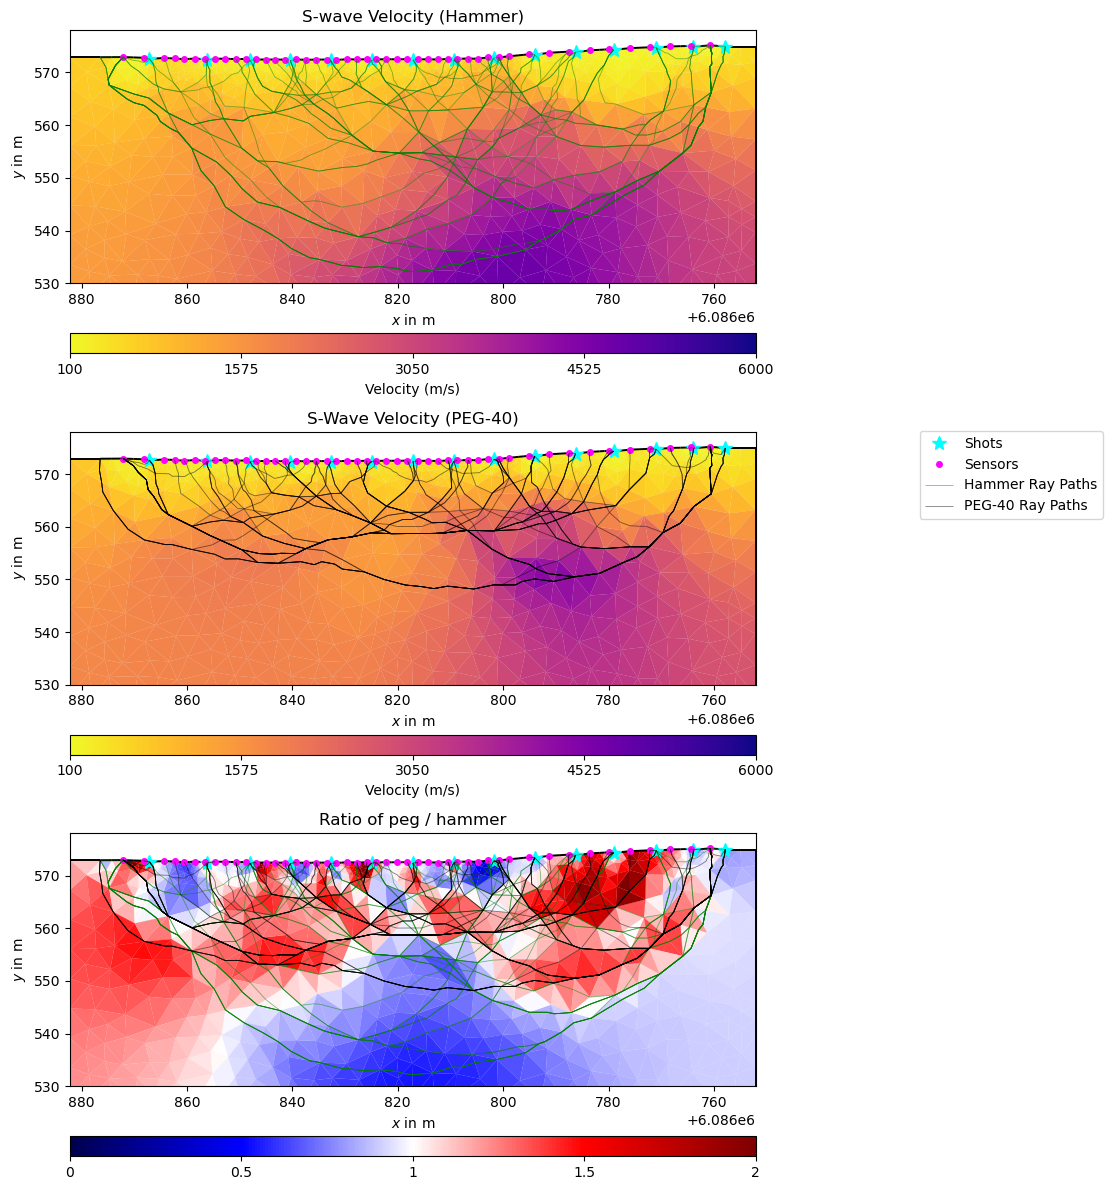

In [24]:
x_coords = pg.x(peg_data)[:47]
y_coords = pg.y(peg_data)[:47]
shot_x_coords = pg.x(peg_data)[48:]
shot_y_coords = pg.y(peg_data)[48:]

fig = plt.figure(figsize=(20,12))
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])


ax3 = fig.add_subplot(gs[2, 0])

# hammer
_, _ = hammer_inversion.showResult(logScale=False, cMin=100, cMax=6000, cMap="plasma_r", ax=ax1)
ax1.invert_xaxis()
ax1.set_title("S-wave Velocity (Hammer)")
ax1.plot(shot_x_coords, shot_y_coords, 'cyan', marker="*", linestyle = "None", label='Shots', markersize=10)  # red dots
ax1.plot(x_coords, y_coords, 'magenta', marker="o", linestyle="None", label='Sensors', markersize = 4)  # red dots
ax1.set_ylim(530, 578)
rays = hammer_inversion.drawRayPaths(ax=ax1, color="green", lw=0.6, alpha=0.5)



# hammer
_, _ = peg_inversion.showResult(logScale=False, cMin=100, cMax=6000, cMap="plasma_r", ax=ax2)
ax2.plot(shot_x_coords, shot_y_coords, 'cyan', marker="*", linestyle = "None", markersize=10)  # red dots
ax2.plot(x_coords, y_coords, 'magenta', marker="o", linestyle="None", markersize = 4)  # red dots
ax2.invert_xaxis()
ax2.set_title("S-Wave Velocity (PEG-40)")
ax2.set_ylim(530, 578)
rays = peg_inversion.drawRayPaths(ax2, color="black", lw=0.6, alpha=0.5)

# Plot ratio
_, _ = pg.show(mesh, velocity_ratio, ax=ax3, cMap="seismic", cMin=0, cMax=2)



ax3.plot(shot_x_coords, shot_y_coords, 'cyan', marker="*", linestyle = "None",  markersize=10)  # red dots
ax3.plot(x_coords, y_coords, 'magenta', marker="o", linestyle="None", markersize = 4)  # red dots
ax3.set_ylim(530, 578)
rays1 = hammer_inversion.drawRayPaths(ax=ax3, color="green", lw=0.6, alpha=0.5, label = "Hammer Ray Paths")
rays2 = peg_inversion.drawRayPaths(ax=ax3, color="black", lw=0.6, alpha=0.5, label = "PEG-40 Ray Paths")




ax3.invert_xaxis()
ax3.set_title("Ratio of peg / hammer")

plt.tight_layout()
fig.legend(loc=6, bbox_to_anchor = (0.75,0.35,0.5,0.5))
plt.savefig("S_wave_velocity_results_figure.png")
plt.show()


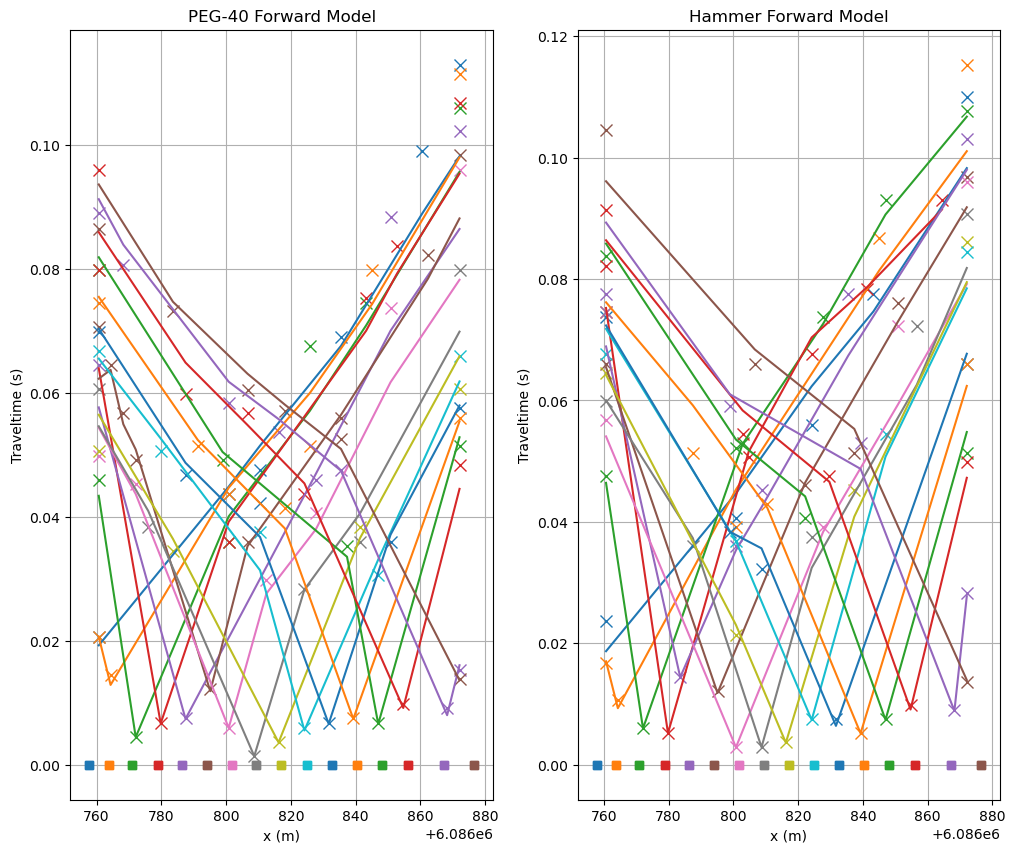

In [25]:
# plot the forward models
fig, ax = plt.subplots(1,2, figsize=(12,10))
peg_inversion.showFit(ax=ax[0],firstPicks=True)
ax[0].set_title("PEG-40 Forward Model")
hammer_inversion.showFit(ax=ax[1],firstPicks=True)
ax[1].set_title("Hammer Forward Model")
plt.savefig("S_wave_forward_model.png")